# Assignment_2

# Part 1: SVM

### Use the following function to plot the classification regions

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,test_size=0.25)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

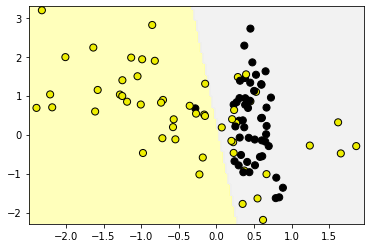

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)
plot_class_regions_for_classifier(svm,X,y)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

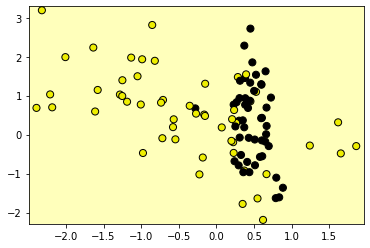

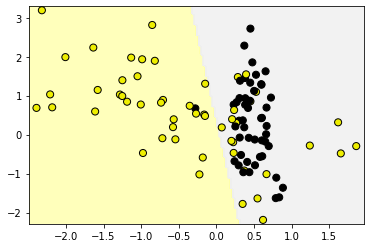

In [ ]:
svm1 = SVC(kernel = 'linear', C=0.00001).fit(X_train, y_train)
svm2 = SVC(kernel = 'linear', C=100.0).fit(X_train, y_train)
plot_class_regions_for_classifier(svm1,X,y)
plot_class_regions_for_classifier(svm2,X,y)

when c=0.0000, there will be no classification as there is no support vector classifier and all the data points will be classified as a yellow class (no importance to mistakes). When c=100, the classifier works better ,although, there are many misclassifications (mistakes are less allowed).

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_fruits=fruits[feature_names_fruits]
y_fruits=fruits['fruit_label']

X_fruits2=fruits[['height','width']]
X_train, X_test, y_train, y_test=train_test_split(X_fruits2,y_fruits,random_state=0,test_size=0.25)

svm = LinearSVC().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

4 models have been trained because there are 4 types of fruits. (apples, mandarins, lemons, and oranges)

In [ ]:
print("The models' coefficients")
print(svm.coef_)
print("The models' intercepts")
print(svm.intercept_)

The models' coefficients
[[-0.27921408  0.47944252]
 [-1.10776843  0.78974965]
 [-0.04068756  0.2197368 ]
 [ 1.01119674 -1.26217727]]
The models' intercepts
[-1.53013218  0.78671148 -1.69263696  0.37206032]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=92185c9c17e64f1d1e5b9a9fe4918d4e37ab3b09b064adead7e554be91ba95a1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


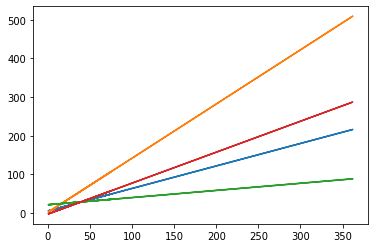

In [ ]:
import mglearn

mf = svm.intercept_.shape[0];
xm = np.r_[np.min(X),np.max(X)]
yf = svm.classes_.copy()
xm = np.r_[np.min(X),np.max(X)]

for jf in np.arange(mf):
    tmp = svm.coef_[jf]
    a = - tmp[0] / tmp[1]; 
    b = - (svm.intercept_[jf]-yf[jf]) / tmp[1]
    yy = a * xm + b
    plt.plot(xm, yy, label='Coeff ='+str(jf))

#mglearn.plots.plot_2d_separator(svm,X_train)
#mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

plt.show()

from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X_train, X_test, y_train, y_test=train_test_split(X_cancer,y_cancer,random_state=0,test_size=0.25)

parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
clf = GridSearchCV(SVC(),parameters)
clf.fit(X_train, y_train)

print("Best parameters")
print(clf.best_params_)


Best parameters
{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
clf = SVC(kernel='rbf', C=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()

X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))


clf = SVC(kernel='rbf', C=10)
clf.fit(X_train_scaled, y_train)

y_predict_scaled = clf.predict(X_test_scaled)

print('accuracy score after data normalization= ',accuracy_score(y_test, y_predict_scaled))

accuracy score after data normalization=  0.972027972027972


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
